In [ ]:
%pip install seaborn

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
sns.set_theme()

In [4]:
first = open("slurm-3904272.out").readlines()
continuation = open("slurm-3957218.out").readlines()

In [5]:
from collections import defaultdict

In [6]:
elosses = defaultdict(list)

for l in first[:]:
    if not l.startswith("Epoch:"):
        continue
    if "Total time" in l:
        continue
    
    epoch = int(l.split("]")[0].split("[")[1].strip())
    iteration = int(l.split("[")[2].split("/")[0].strip())
    loss = float(l.split("loss:")[1].split("(")[0].strip())
    
    elosses[epoch].append(loss)
    
for l in continuation[:]:
    if not l.startswith("Epoch:"):
        continue
    if "Total time" in l:
        continue
    
    epoch = int(l.split("]")[0].split("[")[1].strip())
    iteration = int(l.split("[")[2].split("/")[0].strip())
    loss = float(l.split("loss:")[1].split("(")[0].strip())
    
    elosses[epoch].append(loss)

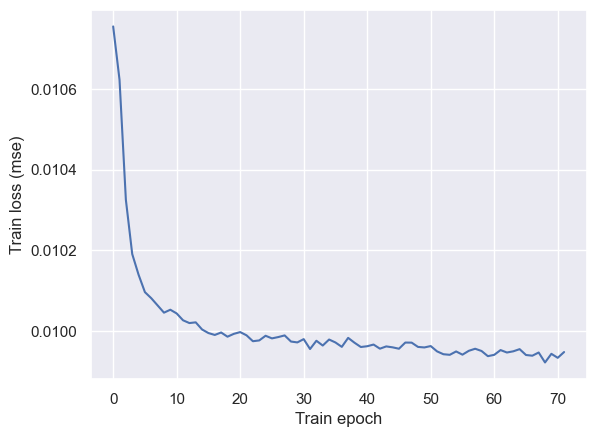

In [8]:
plt.plot([sum(elosses[x]) / (len(elosses[x])+1) for x in list(elosses.keys())[1:-1]])
plt.ylabel("Train loss (mse)")
plt.xlabel("Train epoch")
plt.savefig("pretrain4.pdf")